# Testing an advanced model (InceptionV3)

## Loading a model

In [1]:
import tensorflow as tf
import keras

In [2]:
from tensorflow.keras.applications import InceptionV3
inceptionV3_model = InceptionV3(input_shape=(224, 224,3), include_top=False, weights="imagenet")

In [3]:
for layer in inceptionV3_model.layers:
    layer.trainable = False

In [4]:
print('there are', len(inceptionV3_model.layers), 'layers in inception_model')
print('there are', inceptionV3_model.count_params(), 'parameters in inception_model')

there are 311 layers in inception_model
there are 21802784 parameters in inception_model


In [5]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

inceptionV3_model = Sequential()
inceptionV3_model.add(InceptionV3(include_top=False, weights='imagenet', pooling='max'))
inceptionV3_model.add(Dense(1, activation='sigmoid'))

## Loading latest checkpoint 

In [6]:
import os
checkpoint_path = "training_1\\"
checkpoint_dir = os.path.dirname(checkpoint_path)
os.listdir(checkpoint_dir)

['checkpoint',
 'InceptionV3.ckpt.data-00000-of-00001',
 'InceptionV3.ckpt.index']

In [7]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'training_1\\InceptionV3.ckpt'

In [8]:
# Load the previously saved weights
inceptionV3_model.load_weights(latest)

In [9]:
# import pickle
# filename = 'training_1\\model.pkl'
# loaded_model = pickle.load(open(filename, 'rb'))

## Evaluating the model on mixed test data (good vs bad + confidence) on our own private colleciton

In [10]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def pred(img_fname):
    img = keras.utils.load_img(img_fname, target_size=(224, 224))
    x = keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    pred = inceptionV3_model.predict(x)[0][0]
    return pred

In [12]:
def evaluate(img_fname, threshold=0.5):
    img = keras.utils.load_img(img_fname, target_size=(224, 224))
    score = pred(img_fname)
    score_class = 'good' if score > threshold else 'bad'
    score = score if score_class == 'good' else 1 - score
    print('Predicted:', score_class, 'with prediction (confidence) of ' + str(round(score, 3)))
    plt.imshow(img)
    plt.show()

In [13]:
folder = 'test\\organic mixed (good and bad)\\'
test_files = os.listdir(folder)
print('Totel number of images on the test set is', len(test_files))

Totel number of images on the test set is 20


Predicted: bad with prediction (confidence) of 0.944


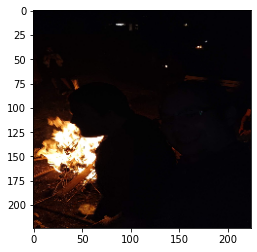

Predicted: bad with prediction (confidence) of 0.95


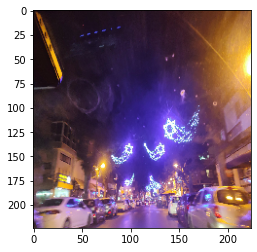

Predicted: good with prediction (confidence) of 0.999


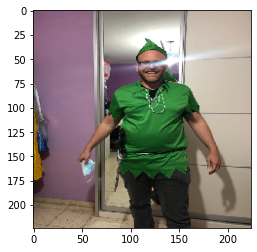

Predicted: bad with prediction (confidence) of 1.0


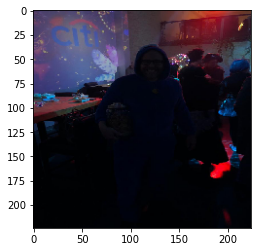

Predicted: good with prediction (confidence) of 0.998


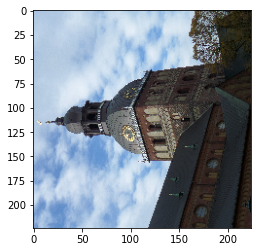

Predicted: good with prediction (confidence) of 1.0


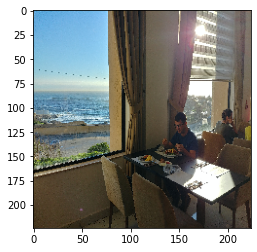

Predicted: good with prediction (confidence) of 1.0


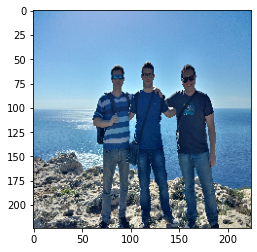

Predicted: good with prediction (confidence) of 1.0


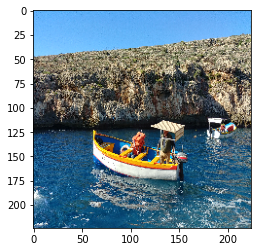

Predicted: good with prediction (confidence) of 1.0


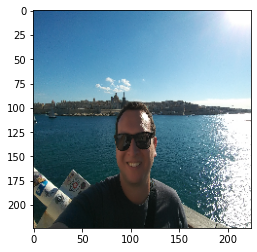

Predicted: bad with prediction (confidence) of 0.998


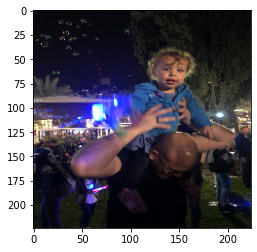

Predicted: good with prediction (confidence) of 0.991


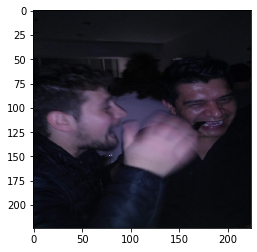

Predicted: good with prediction (confidence) of 0.766


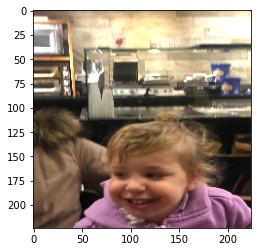

Predicted: good with prediction (confidence) of 0.999


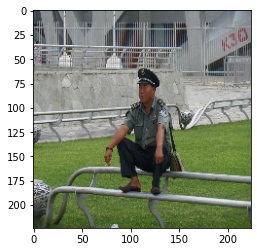

Predicted: good with prediction (confidence) of 0.982


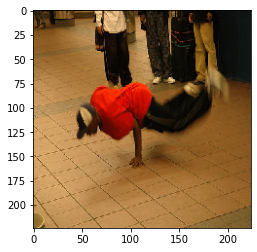

Predicted: good with prediction (confidence) of 0.827


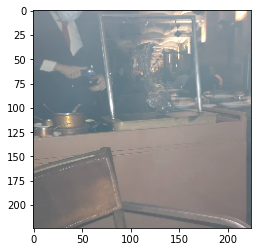

Predicted: bad with prediction (confidence) of 0.644


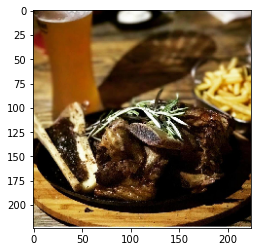

Predicted: good with prediction (confidence) of 1.0


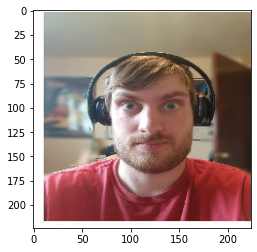

Predicted: good with prediction (confidence) of 1.0


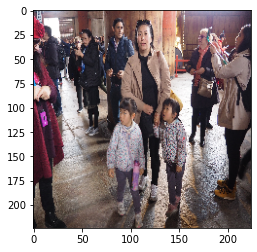

Predicted: bad with prediction (confidence) of 1.0


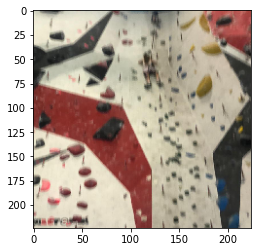

Predicted: bad with prediction (confidence) of 0.854


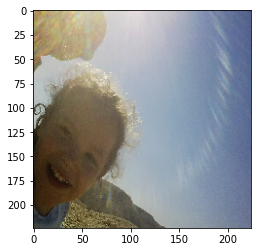

In [14]:
for filename in test_files:
    evaluate(folder + filename)

In [15]:
photo_score = dict()
for filename in test_files:
    photo_score[filename] = pred(folder + filename)

### Separating the good and good averaged scored photos from the best scored photos (by a threshold)

In [16]:
def show_photos(photos_list):
    for img_name in photos_list:
        img = keras.utils.load_img(folder + img_name, target_size=(224, 224))
        x = keras.utils.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        print(img_name)
        plt.imshow(img)
        plt.show()

In [17]:
good_photos = {k:v for (k,v) in photo_score.items() if (v > 0.5) & (v < 0.9)}
best_photos = {k:v for (k,v) in photo_score.items() if v >= 0.9}

In [18]:
print('Good photos (0.5 < threshold < 0.9): ', len(good_photos))
print('Best photos (threshold >= 0.9): ', len(best_photos))

Good photos (0.5 < threshold < 0.9):  2
Best photos (threshold >= 0.9):  11


#### Good average scored photos (score between 0.5 and 0.9)

2.jpg


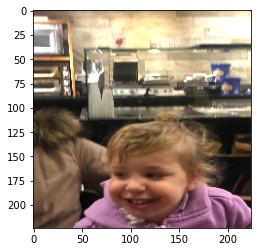

4.jpg


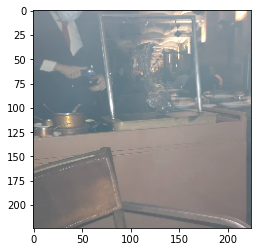

In [19]:
show_photos(good_photos)

#### Best scored photos (score over 0.9)

11.jpg


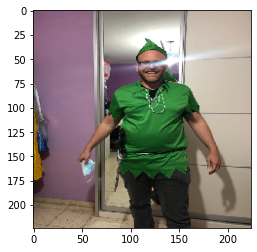

13.JPG


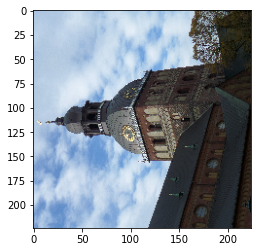

14.jpg


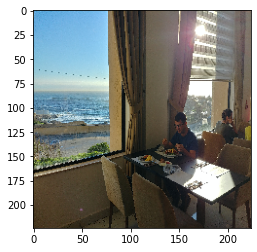

15.jpg


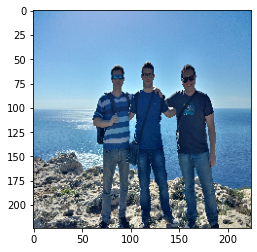

16.jpg


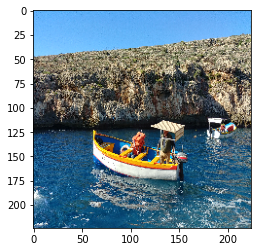

17.jpg


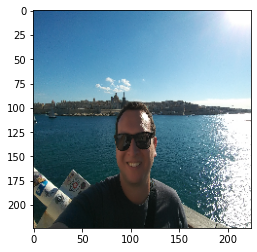

19.jpg


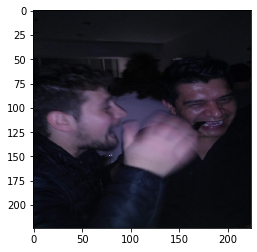

20.JPG


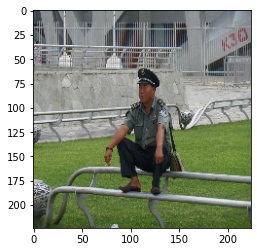

3.jpg


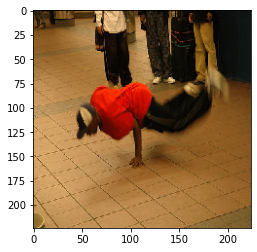

6.jpg


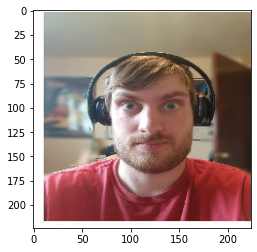

7.JPG


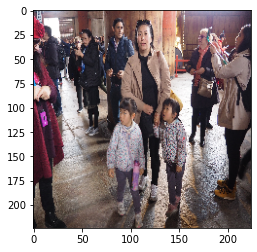

In [20]:
show_photos(best_photos)

### Worst scored photos (score equal and below 0.5)

In [21]:
worst_photos = {k:v for (k,v) in photo_score.items() if v <= 0.5}

In [22]:
print('Worst photos (threshold <= 0.5): ', len(worst_photos))

Worst photos (threshold <= 0.5):  7


1.jpg


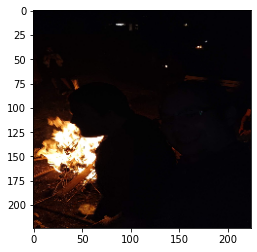

10.jpg


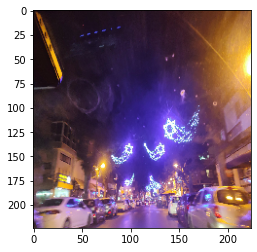

12.jpg


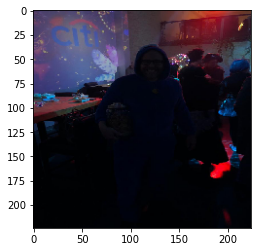

18.jpg


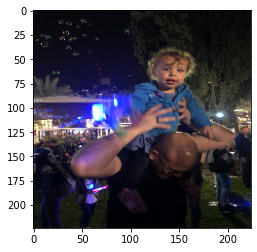

5.jpg


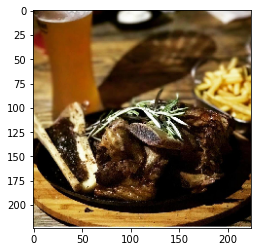

8.jpg


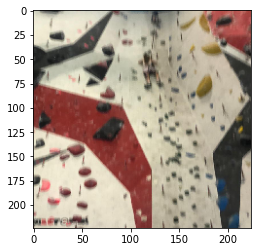

9.jpg


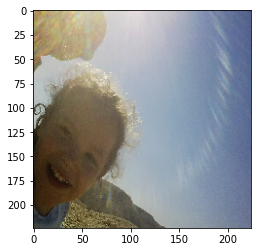

In [23]:
show_photos(worst_photos)

### Two samples of the highest score photos and the lowest score photos

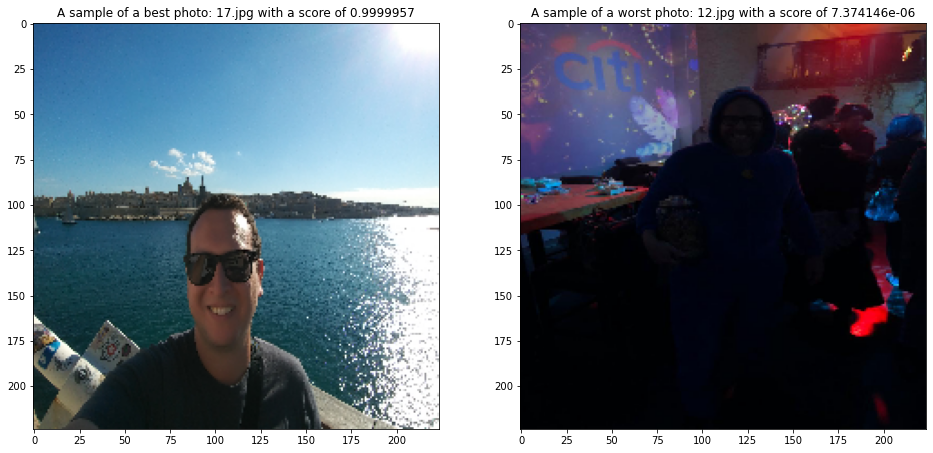

In [24]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 16 ,8

highest_score_photo = max(photo_score, key= lambda x: photo_score[x])

img = keras.utils.load_img(folder + highest_score_photo, target_size=(224, 224))
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
plt.subplot(1, 2, 1)
plt.title('A sample of a best photo: ' + highest_score_photo + ' with a score of ' + str(photo_score[highest_score_photo]))
plt.imshow(img)

lowest_score_photo = min(photo_score, key= lambda x: photo_score[x])

img = keras.utils.load_img(folder + lowest_score_photo, target_size=(224, 224))
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
plt.subplot(1, 2, 2)
plt.title('A sample of a worst photo: ' + lowest_score_photo + ' with a score of ' + str(photo_score[lowest_score_photo]))
plt.imshow(img);

###  All of the highest score photos

In [25]:
highest_score_photos = [k for k, v in photo_score.items() if v == photo_score[highest_score_photo]]
print('There are ' + str(len(highest_score_photos)) + ' best scored photos with a score of ' + str(photo_score[highest_score_photo]))
# show_photos(highest_score_photos)

There are 1 best scored photos with a score of 0.9999957


### All of the lowest score photos

In [26]:
lowest_score_photos = [k for k, v in photo_score.items() if v == photo_score[lowest_score_photo]]
print('There are ' + str(len(lowest_score_photos)) + ' worst scored photos with a score of ' + str(photo_score[lowest_score_photo]))
# show_photos(lowest_score_photos)

There are 1 worst scored photos with a score of 7.374146e-06


## Testing the model on organic test data (our private collection)

In [27]:
threshold = 0.795

In [28]:
from keras.preprocessing.image import ImageDataGenerator
img_gen = ImageDataGenerator(validation_split=0.2)

In [29]:
test_data = img_gen.flow_from_directory(
    'test\\organic',
    target_size=(224, 224),
    class_mode=None,
    shuffle=False,
)

Found 176 images belonging to 2 classes.


In [30]:
bad_folder = 'test\\organic\\bad\\'
bad_test_files = os.listdir(bad_folder)
print('Totel number of images on the bad test set is', len(bad_test_files))

Totel number of images on the bad test set is 110


In [31]:
good_folder = 'test\\organic\\good\\'
good_test_files = os.listdir(good_folder)
print('Totel number of images on the good test set is', len(good_test_files))

Totel number of images on the good test set is 66


In [32]:
from PIL import Image
from tqdm import tqdm
pred_score = list()

In [33]:
for filename in tqdm(bad_test_files):
    pred_score.append(pred(bad_folder + filename))

100%|████████████████████████████████████████████████████████████████████████████████| 110/110 [00:12<00:00,  8.70it/s]


In [34]:
for filename in tqdm(good_test_files):
    pred_score.append(pred(good_folder + filename))

100%|██████████████████████████████████████████████████████████████████████████████████| 66/66 [00:06<00:00,  9.81it/s]


In [35]:
pred = np.array(pred_score)

In [36]:
y_true = test_data.classes
y_pred = pred > threshold

### Confusion matrix

In [37]:
from sklearn.metrics import confusion_matrix

font = {
'family': 'Arial',
'size': 22
}
plt.rc('font', **font)
mat = confusion_matrix(y_true, y_pred)

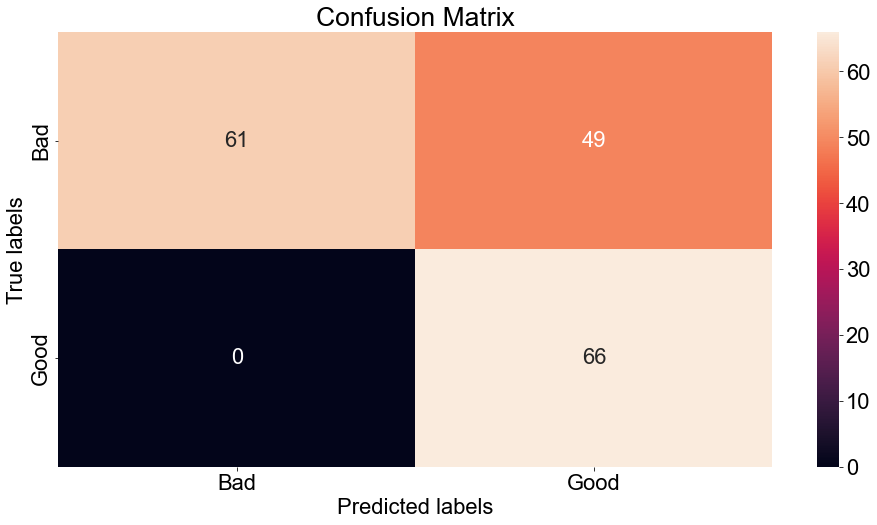

In [38]:
import seaborn as sns

ax= plt.subplot()
sns.heatmap(mat, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Bad', 'Good']); ax.yaxis.set_ticklabels(['Bad', 'Good']);

In [39]:
FP = mat[0][1]
FN = mat[1][0]
FP_rate = FP / (mat[0][0] + mat[0][1])
FN_rate = FN / (mat[1][0] + mat[1][1])
print('False Positive rate:', FP_rate)
print('False Negative rate:', FN_rate)

False Positive rate: 0.44545454545454544
False Negative rate: 0.0


### Classification report

In [40]:
from sklearn.metrics import classification_report
target_names = ['bad', 'good']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         bad       1.00      0.55      0.71       110
        good       0.57      1.00      0.73        66

    accuracy                           0.72       176
   macro avg       0.79      0.78      0.72       176
weighted avg       0.84      0.72      0.72       176



In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.7215909090909091

In [42]:
from sklearn.metrics import recall_score
recall_score(y_true, y_pred)

1.0

In [43]:
from sklearn.metrics import precision_score
precision_score(y_true, y_pred)

0.5739130434782609

In [44]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred)

0.7292817679558011

### ROC Curve and auc

In [45]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_true, pred)

In [46]:
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_true, pred)
print('AUC: %.3f' % auc)

AUC: 0.961


No Skill: ROC AUC=0.500
VGG16: ROC AUC=0.961


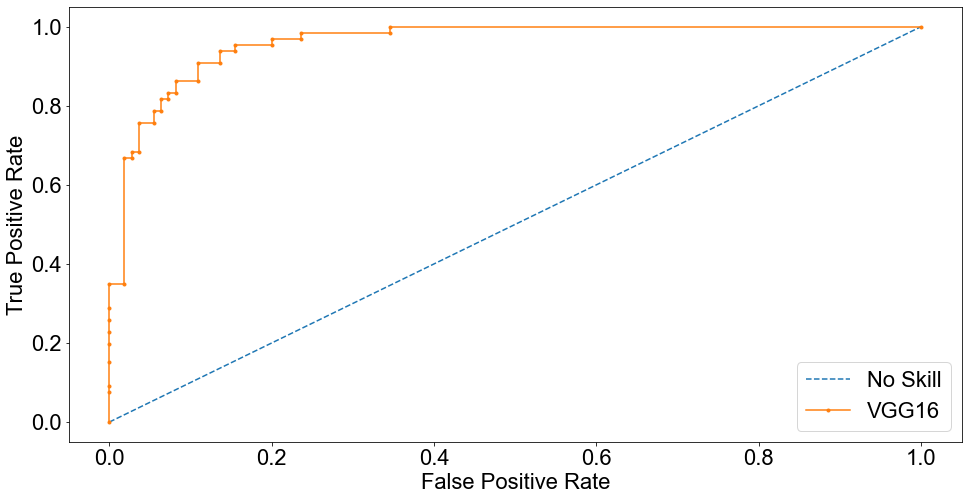

In [47]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_true))]
# keep probabilities for the positive outcome only
lr_probs = pred
# calculate scores
ns_auc = roc_auc_score(y_true, ns_probs)
lr_auc = roc_auc_score(y_true, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('VGG16: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_true, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_true, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='VGG16')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Precision-Recall Curve

In [48]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_true, pred)

VGG16: f1=0.729 auc=0.931


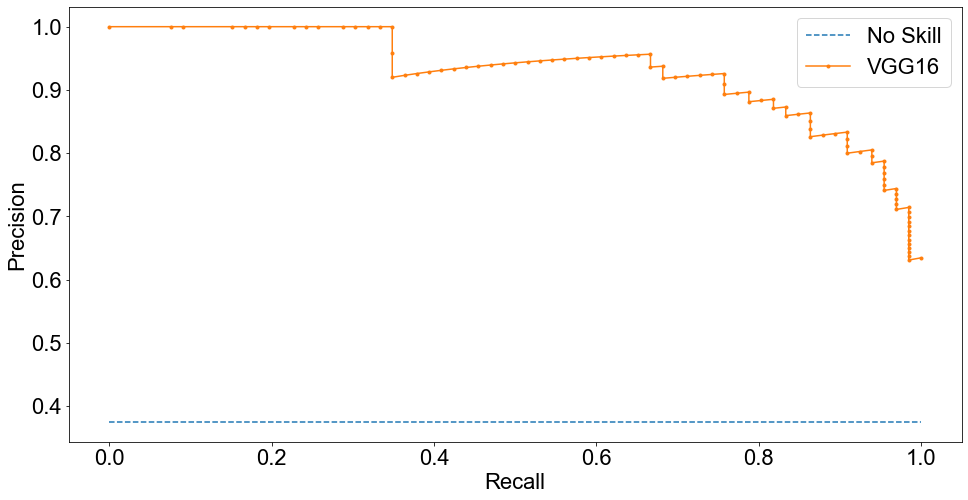

In [49]:
from sklearn.metrics import auc

# predict probabilities
lr_probs = pred
# predict class values
yhat = y_pred
lr_precision, lr_recall, _ = precision_recall_curve(y_true, lr_probs)
lr_f1, lr_auc = f1_score(y_true, y_pred), auc(lr_recall, lr_precision)
# summarize scores
print('VGG16: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_true[y_true==1]) / len(y_true)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='VGG16')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

### Two samples of the highest score photos and the lowest score photos

In [50]:
organic_test_photos_score = dict()
organic_folder = 'test\\organic\\'
len_bad = len(os.listdir(organic_folder + 'bad'))
for idx, image_file in enumerate(os.listdir(organic_folder + 'bad')):
    organic_test_photos_score[image_file] = pred[idx]
for idx, image_file in enumerate(os.listdir(organic_folder + 'good')):
    organic_test_photos_score[image_file] = pred[len_bad + idx]

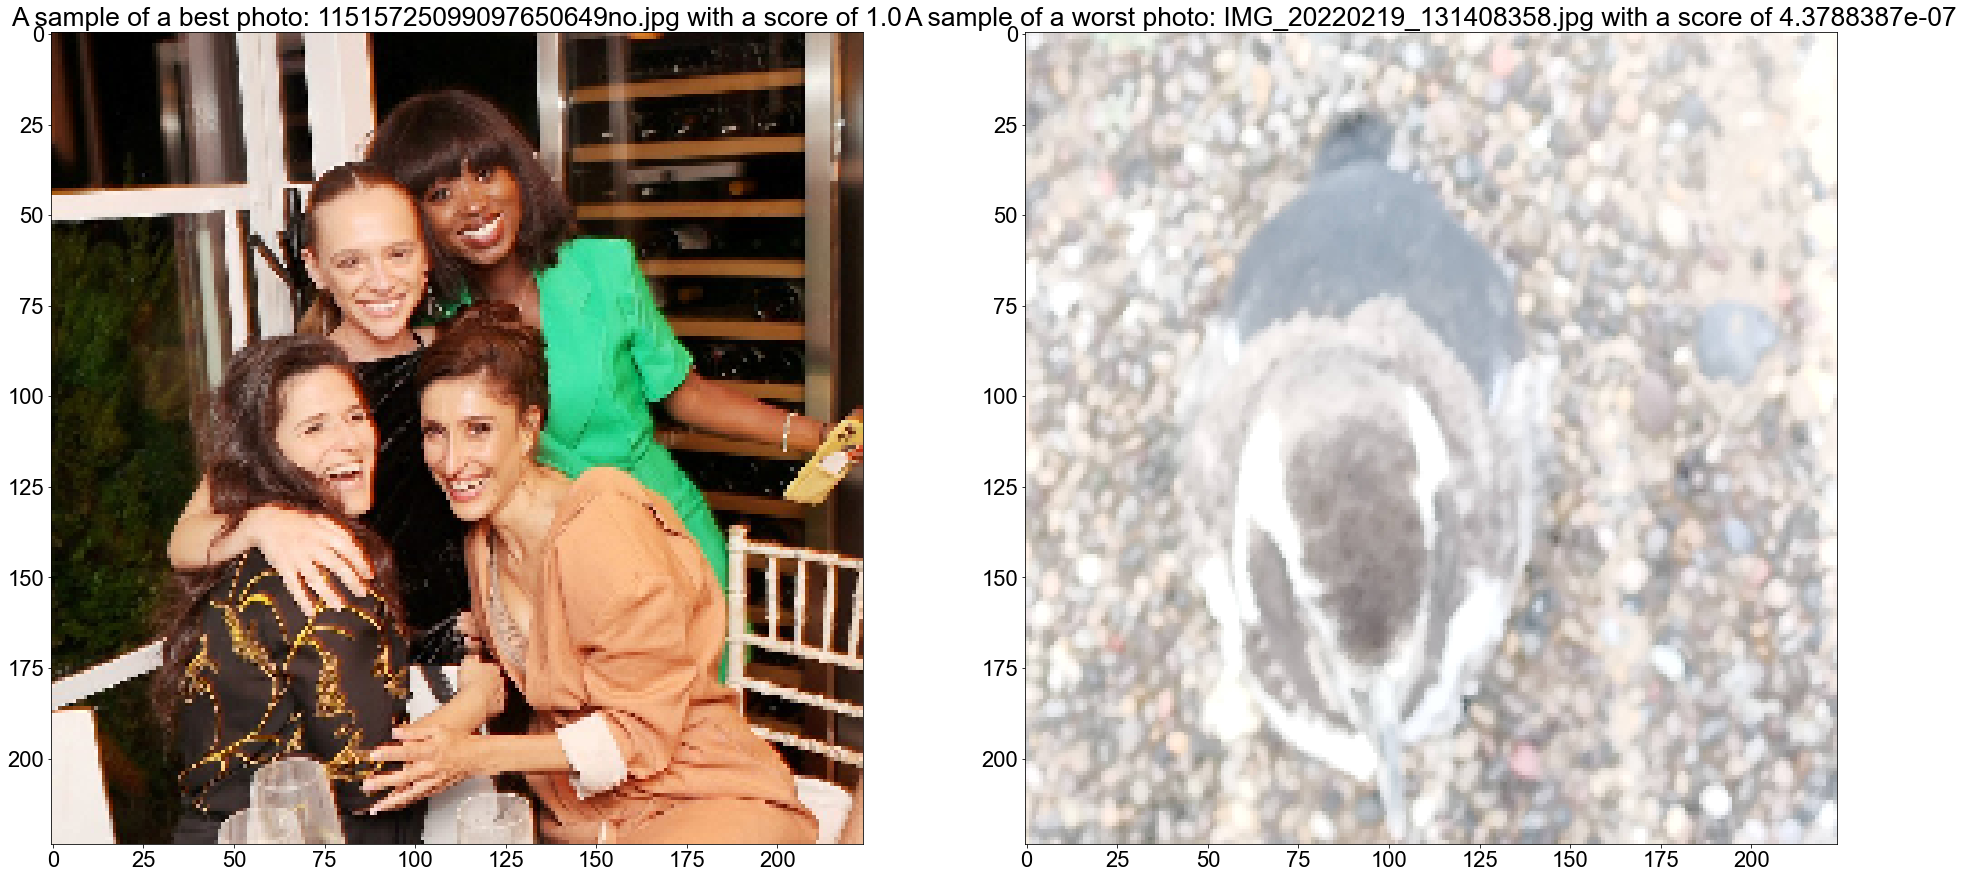

In [51]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 32 ,20

highest_score_photo = max(organic_test_photos_score, key= lambda x: organic_test_photos_score[x])

img = keras.utils.load_img(organic_folder + 'good\\' + highest_score_photo, target_size=(224, 224))
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
plt.subplot(1, 2, 1)
plt.title('A sample of a best photo: ' + highest_score_photo + ' with a score of ' + str(organic_test_photos_score[highest_score_photo]))
plt.imshow(img)

lowest_score_photo = min(organic_test_photos_score, key= lambda x: organic_test_photos_score[x])

img = keras.utils.load_img(organic_folder  + 'bad\\' + lowest_score_photo, target_size=(224, 224))
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
plt.subplot(1, 2, 2)
plt.title('A sample of a worst photo: ' + lowest_score_photo + ' with a score of ' + str(organic_test_photos_score[lowest_score_photo]))
plt.imshow(img);

## Testing the model on good and synthetic-bad test data from the flicker30k collection

In [52]:
threshold = 0.5

In [53]:
from keras.preprocessing.image import ImageDataGenerator
img_gen = ImageDataGenerator(validation_split=0.2)

In [54]:
test_data = img_gen.flow_from_directory(
    'test\\synthetic\\',
    target_size=(224, 224),
    class_mode=None,
    shuffle=False,
)

Found 1400 images belonging to 2 classes.


In [55]:
bad_folder = 'test\\synthetic\\bad\\'
bad_test_files = os.listdir(bad_folder)
print('Totel number of images on the bad test set is', len(bad_test_files))

Totel number of images on the bad test set is 700


In [56]:
good_folder = 'test\\synthetic\\good\\'
good_test_files = os.listdir(good_folder)
print('Totel number of images on the good test set is', len(good_test_files))

Totel number of images on the good test set is 700


In [57]:
def pred(img_fname):
    img = keras.utils.load_img(img_fname, target_size=(224, 224))
    x = keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    pred = inceptionV3_model.predict(x)[0][0]
    return pred

In [58]:
from PIL import Image
from tqdm import tqdm
pred_score = list()

In [59]:
for filename in tqdm(bad_test_files):
    pred_score.append(pred(bad_folder + filename))

100%|████████████████████████████████████████████████████████████████████████████████| 700/700 [00:36<00:00, 19.27it/s]


In [60]:
for filename in tqdm(good_test_files):
    pred_score.append(pred(good_folder + filename))

100%|████████████████████████████████████████████████████████████████████████████████| 700/700 [00:37<00:00, 18.54it/s]


In [61]:
pred = np.array(pred_score)

In [62]:
y_true = test_data.classes
y_pred = pred > threshold

### Confusion matrix

In [63]:
from sklearn.metrics import confusion_matrix

font = {
'family': 'Arial',
'size': 22
}
plt.rc('font', **font)
mat = confusion_matrix(y_true, y_pred)

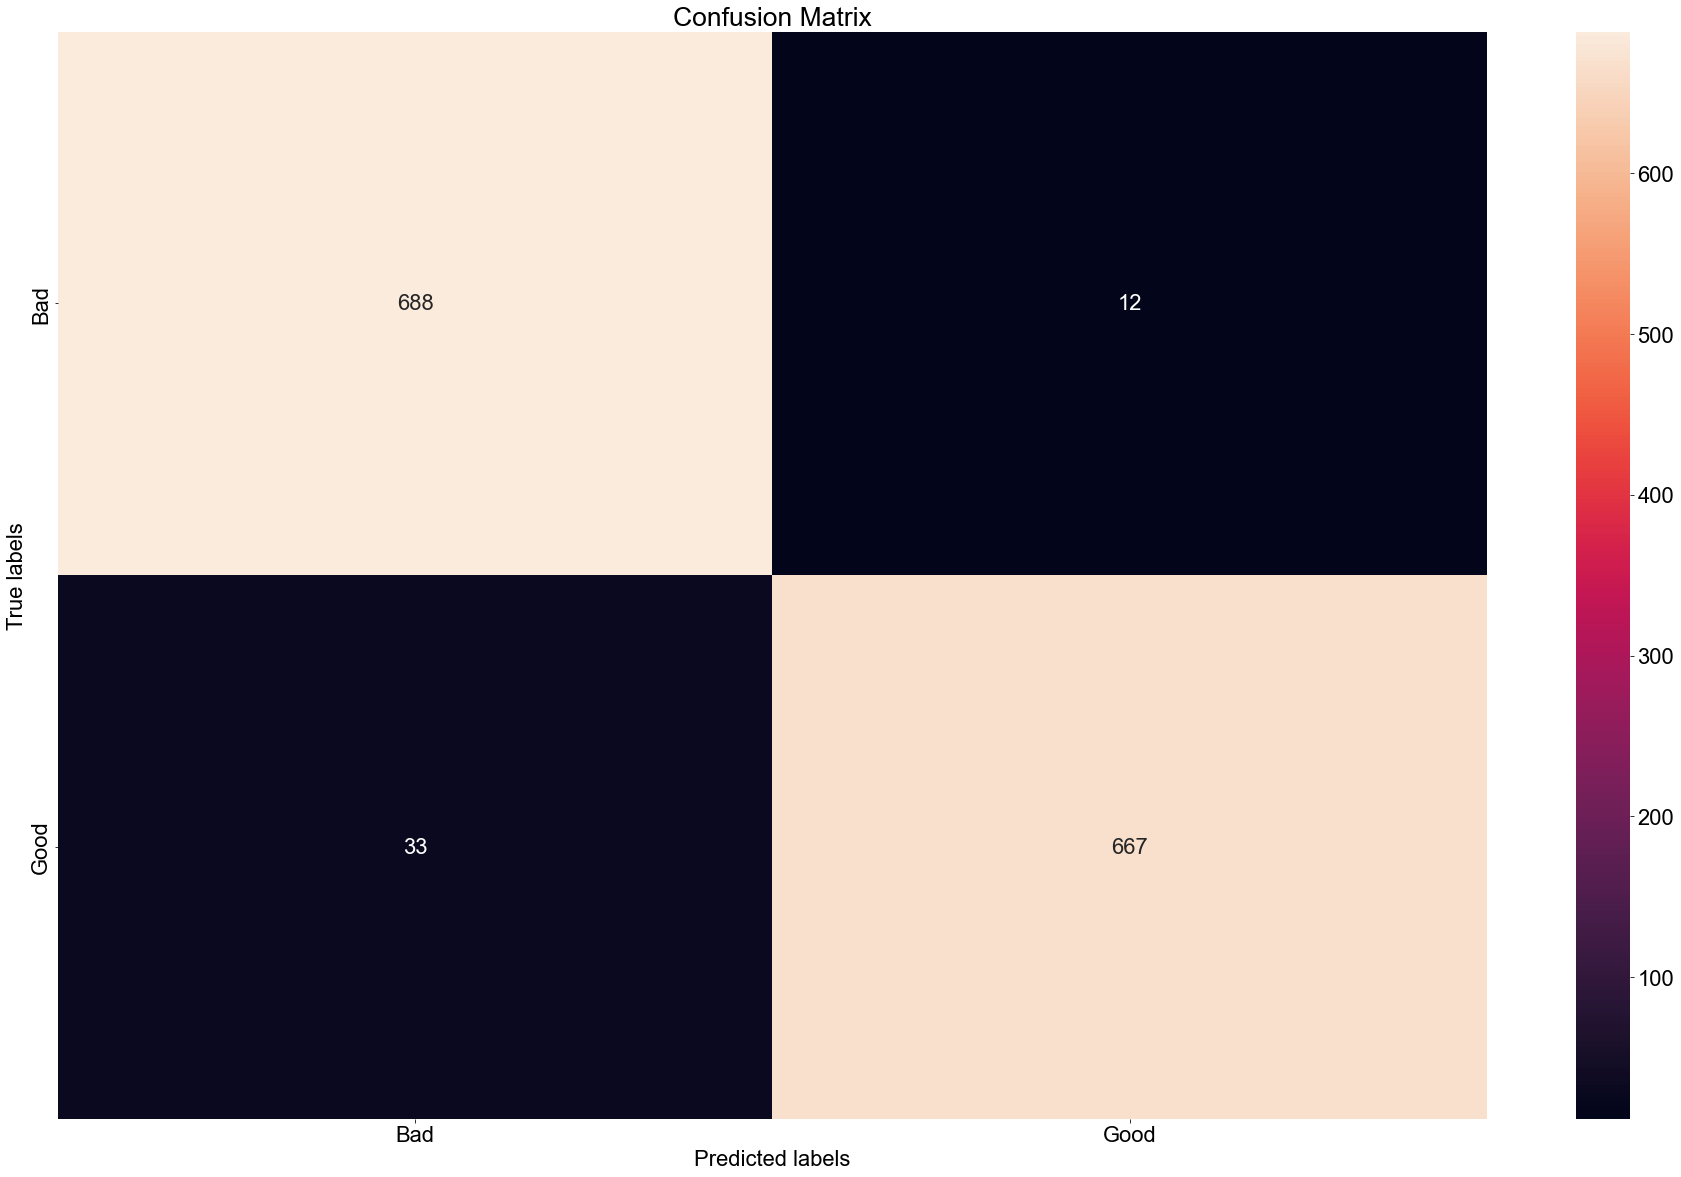

In [64]:
import seaborn as sns

ax= plt.subplot()
sns.heatmap(mat, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Bad', 'Good']); ax.yaxis.set_ticklabels(['Bad', 'Good']);

In [65]:
FP = mat[0][1]
FN = mat[1][0]
FP_rate = FP / (mat[0][0] + mat[0][1])
FN_rate = FN / (mat[1][0] + mat[1][1])
print('False Positive rate:', FP_rate)
print('False Negative rate:', FN_rate)

False Positive rate: 0.017142857142857144
False Negative rate: 0.047142857142857146


### Classification report

In [66]:
from sklearn.metrics import classification_report
target_names = ['bad', 'good']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         bad       0.95      0.98      0.97       700
        good       0.98      0.95      0.97       700

    accuracy                           0.97      1400
   macro avg       0.97      0.97      0.97      1400
weighted avg       0.97      0.97      0.97      1400



In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.9678571428571429

In [68]:
from sklearn.metrics import recall_score
recall_score(y_true, y_pred)

0.9528571428571428

In [69]:
from sklearn.metrics import precision_score
precision_score(y_true, y_pred)

0.9823269513991163

In [70]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred)

0.9673676577229876

### ROC Curve and auc

In [71]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_true, pred)

In [72]:
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_true, pred)
print('AUC: %.3f' % auc)

AUC: 0.996


No Skill: ROC AUC=0.500
InceptionV3: ROC AUC=0.996


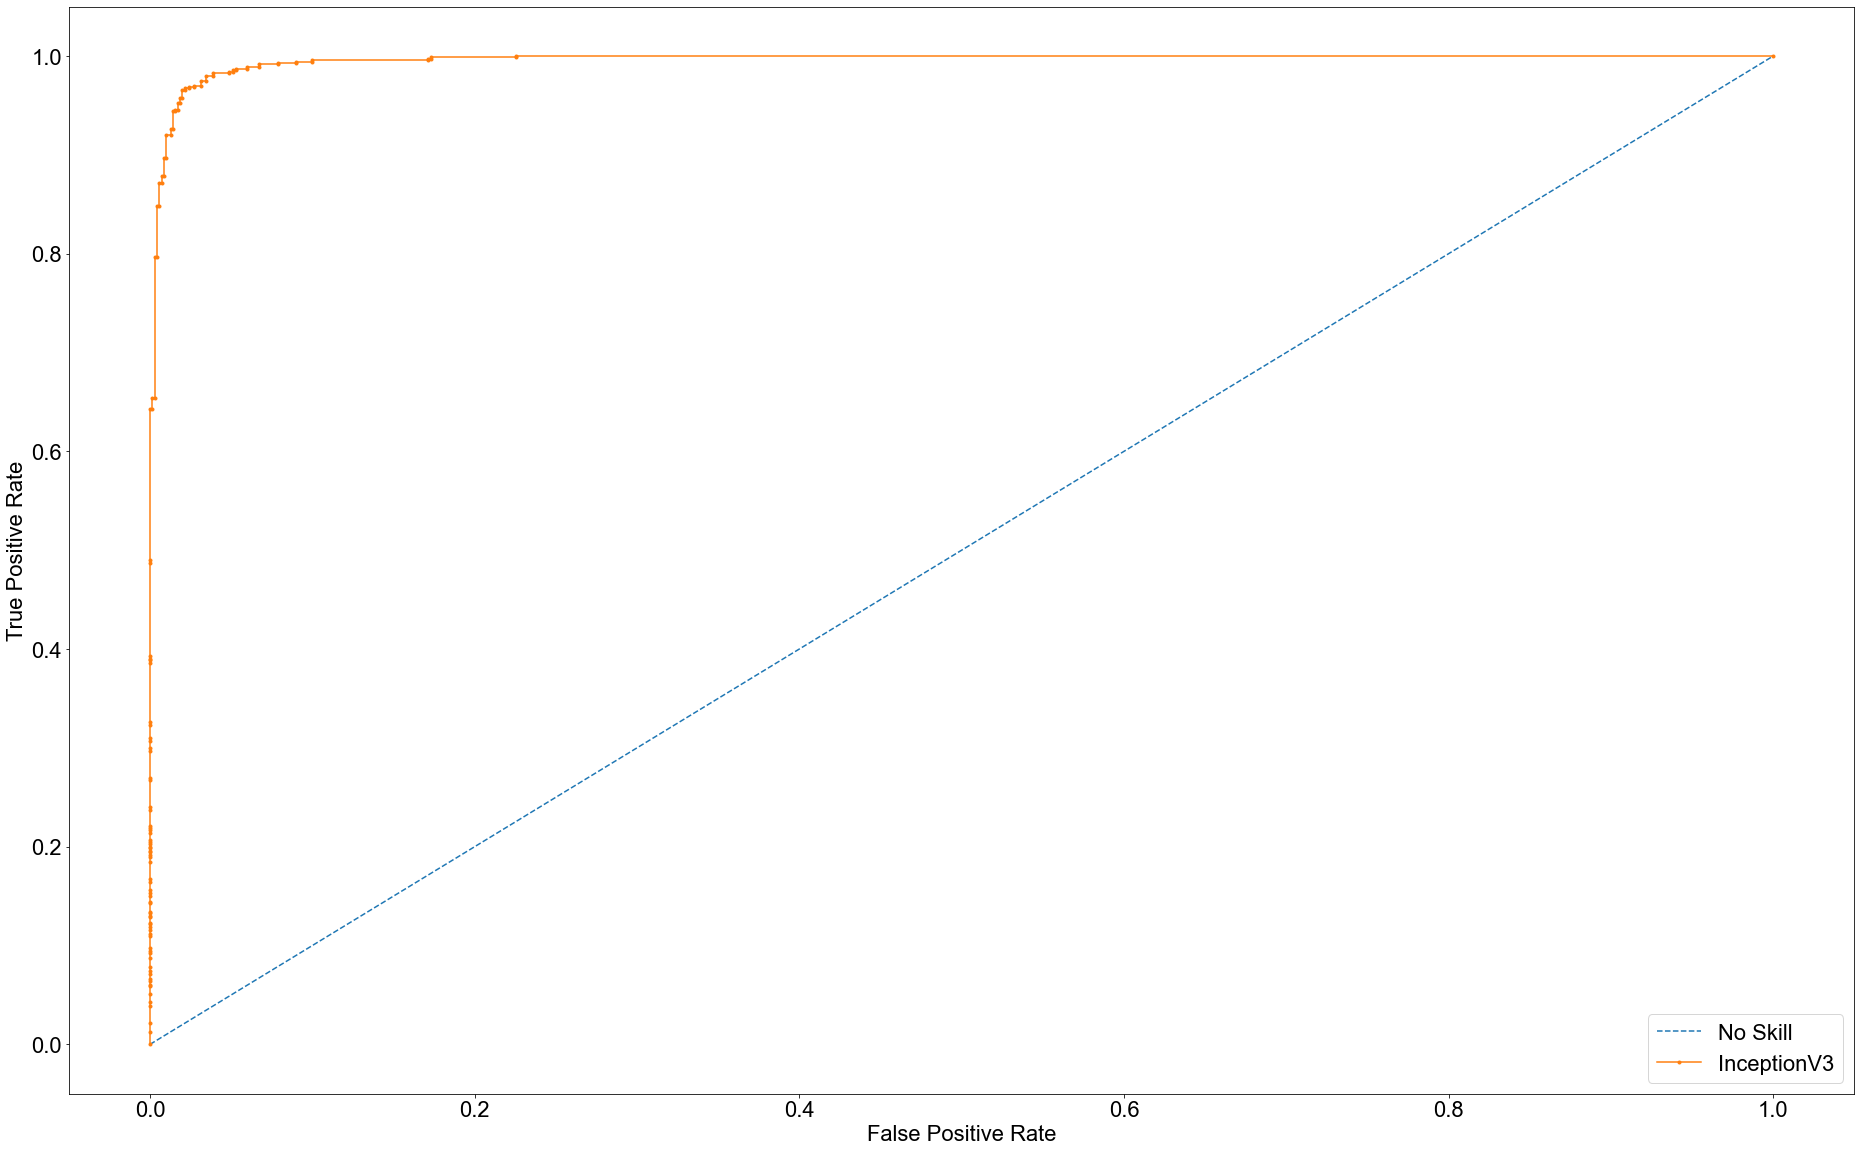

In [78]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_true))]
# keep probabilities for the positive outcome only
lr_probs = pred
# calculate scores
ns_auc = roc_auc_score(y_true, ns_probs)
lr_auc = roc_auc_score(y_true, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('InceptionV3: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_true, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_true, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='InceptionV3')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Precision-Recall Curve

In [74]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_true, pred)

VGG16: f1=0.967 auc=0.996


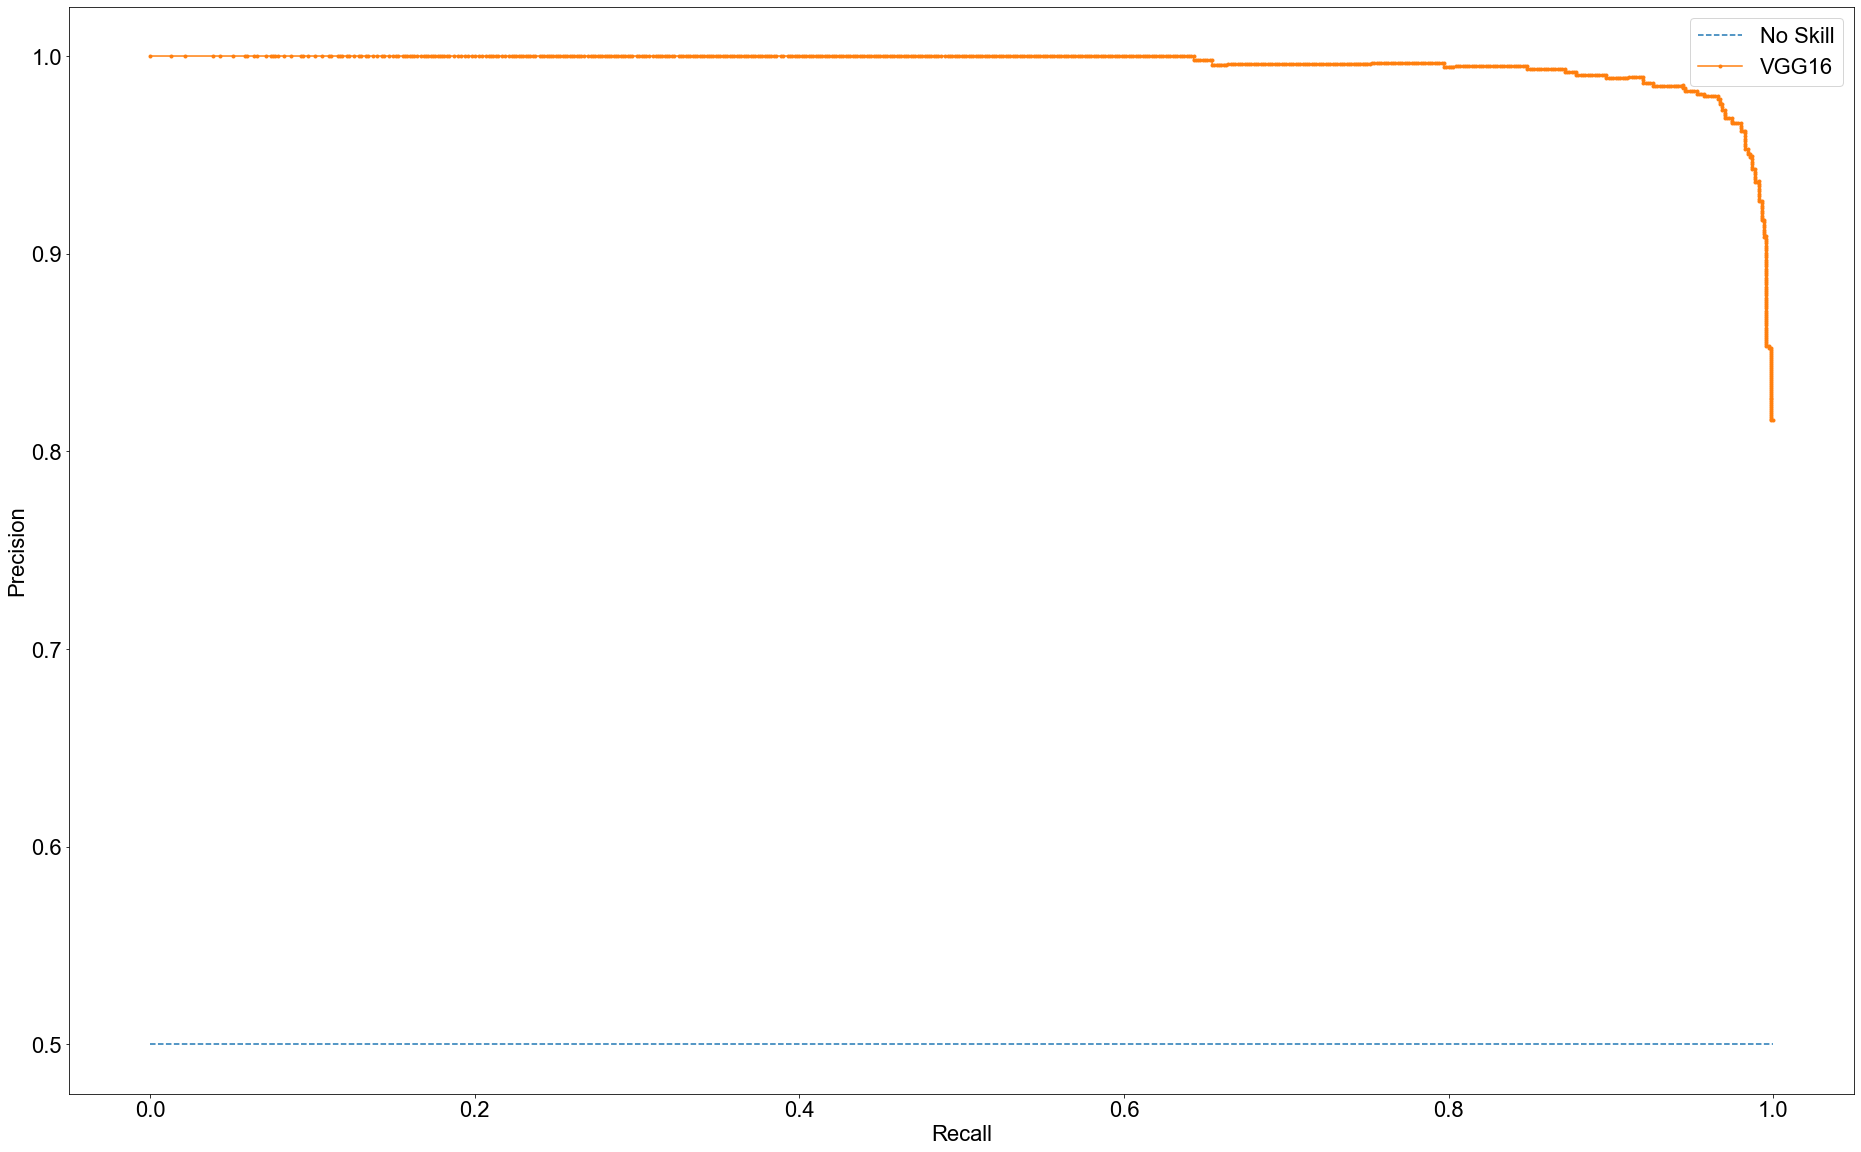

In [75]:
from sklearn.metrics import auc

# predict probabilities
lr_probs = pred
# predict class values
yhat = y_pred
lr_precision, lr_recall, _ = precision_recall_curve(y_true, lr_probs)
lr_f1, lr_auc = f1_score(y_true, y_pred), auc(lr_recall, lr_precision)
# summarize scores
print('VGG16: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_true[y_true==1]) / len(y_true)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='VGG16')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

### Two samples of the highest score photos and the lowest score photos

In [76]:
synthetic_test_photos_score = dict()
synthetic_folder = 'test\\synthetic\\'
len_bad = len(os.listdir(synthetic_folder + 'bad'))
for idx, image_file in enumerate(os.listdir(synthetic_folder + 'bad')):
    synthetic_test_photos_score[image_file] = pred[idx]
for idx, image_file in enumerate(os.listdir(synthetic_folder + 'good')):
    synthetic_test_photos_score[image_file] = pred[len_bad + idx]

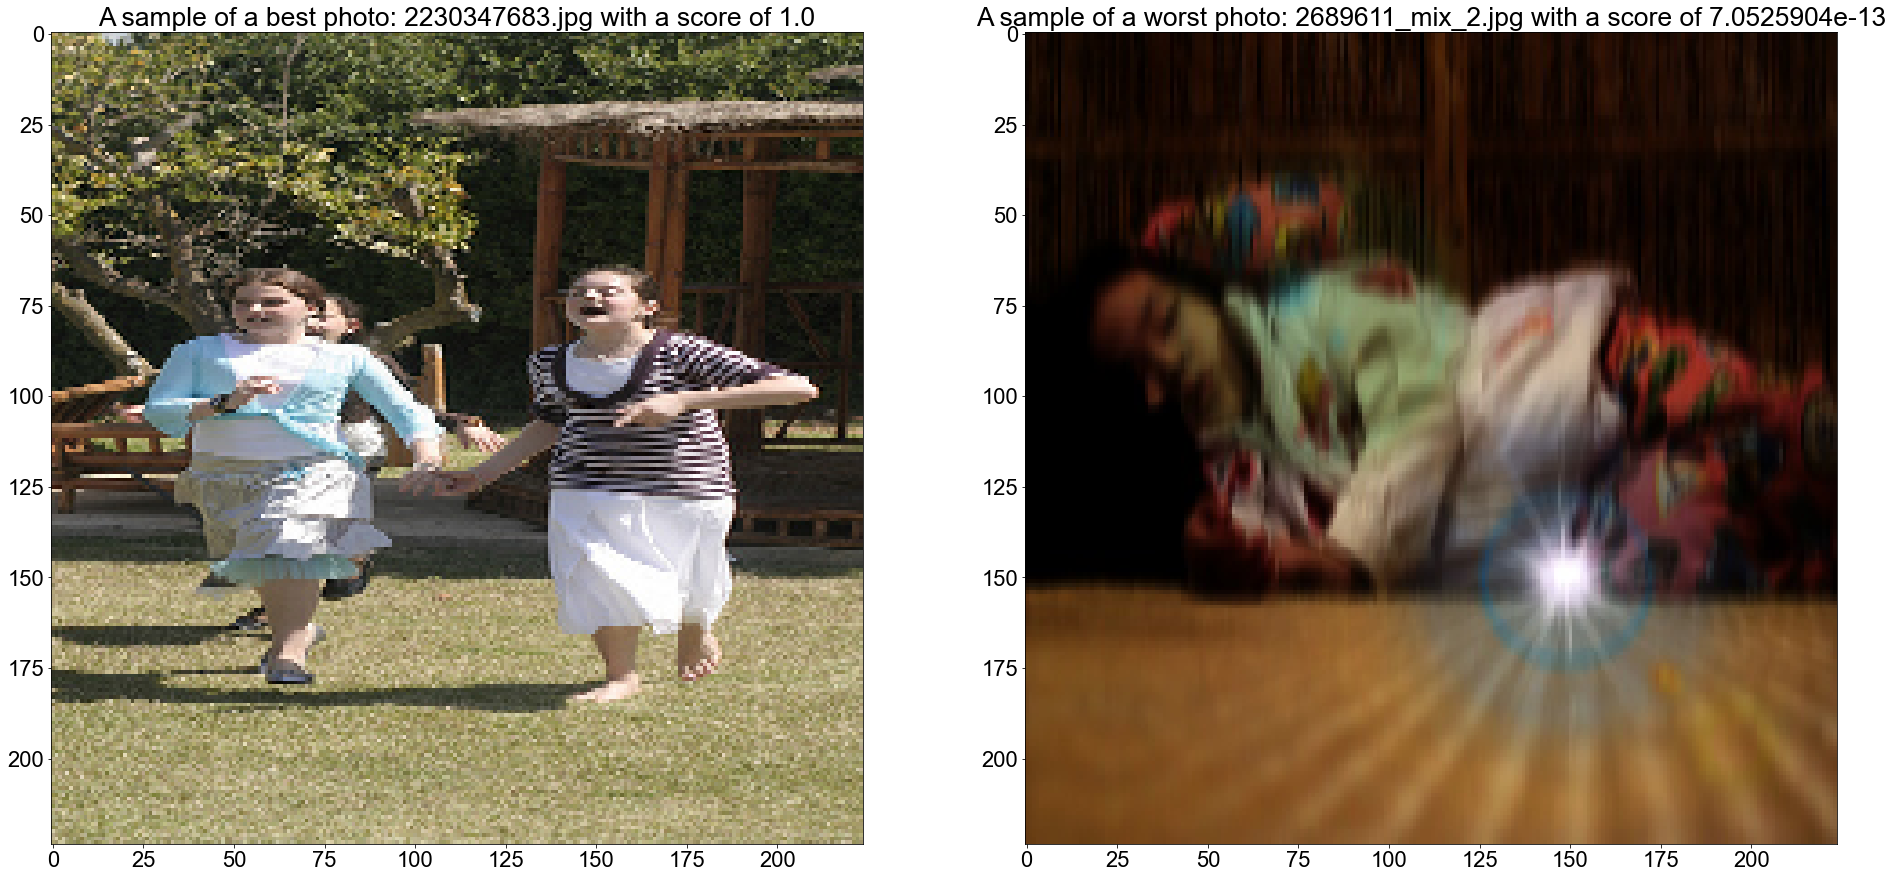

In [77]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 32 ,20

highest_score_photo = max(synthetic_test_photos_score, key= lambda x: synthetic_test_photos_score[x])

img = keras.utils.load_img(synthetic_folder + 'good\\' + highest_score_photo, target_size=(224, 224))
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
plt.subplot(1, 2, 1)
plt.title('A sample of a best photo: ' + highest_score_photo + ' with a score of ' + str(synthetic_test_photos_score[highest_score_photo]))
plt.imshow(img)

lowest_score_photo = min(synthetic_test_photos_score, key= lambda x: synthetic_test_photos_score[x])

img = keras.utils.load_img(synthetic_folder  + 'bad\\' + lowest_score_photo, target_size=(224, 224))
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
plt.subplot(1, 2, 2)
plt.title('A sample of a worst photo: ' + lowest_score_photo + ' with a score of ' + str(synthetic_test_photos_score[lowest_score_photo]))
plt.imshow(img);